In [76]:
# importing Modules
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi']=300

In [77]:
# Reading our Data
data = pd.read_csv('creditcard_csv.csv',index_col=0)

In [78]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [79]:
# Refining Data
data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [109]:
target = data['Class']
my_dict={ 'Not Fraud':0,'Fraud':1}

In [81]:
target.head()

Time
0.0    '0'
0.0    '0'
1.0    '0'
1.0    '0'
2.0    '0'
Name: Class, dtype: object

In [82]:
features = data.drop('Class',axis=1)

In [83]:
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [84]:
# Let us Scale our Data
from sklearn.preprocessing import StandardScaler
scale_model = StandardScaler()
scaled_features = scale_model.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

In [85]:
# Splitting Our Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_features,target,test_size=0.2)

In [86]:
x_train.shape

(227845, 29)

In [87]:
# Importing Our Model
from sklearn.linear_model import LogisticRegression

In [88]:
model = LogisticRegression()

In [89]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
pred = model.predict(x_test)

In [100]:
 # Model Evaluation
    y_test.head()

Time
90043.0     '0'
37390.0     '0'
79081.0     '0'
171793.0    '0'
163889.0    '0'
Name: Class, dtype: object

In [104]:
pred[:5]

array(["'0'", "'0'", "'0'", "'0'", "'0'"], dtype=object)

In [110]:
# Model Accuracy
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [106]:
print(f'{accuracy_score(y_test,pred)}')

0.9992099996488887


In [107]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     56859
         '1'       0.87      0.66      0.75       103

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [111]:
confusion_matrix(y_test,pred)

array([[56849,    10],
       [   35,    68]], dtype=int64)

In [112]:
cnf = pd.DataFrame(confusion_matrix(y_test,pred),columns=['Not Fraud','Fraud'],index=['Not Fraud','Fraud'])

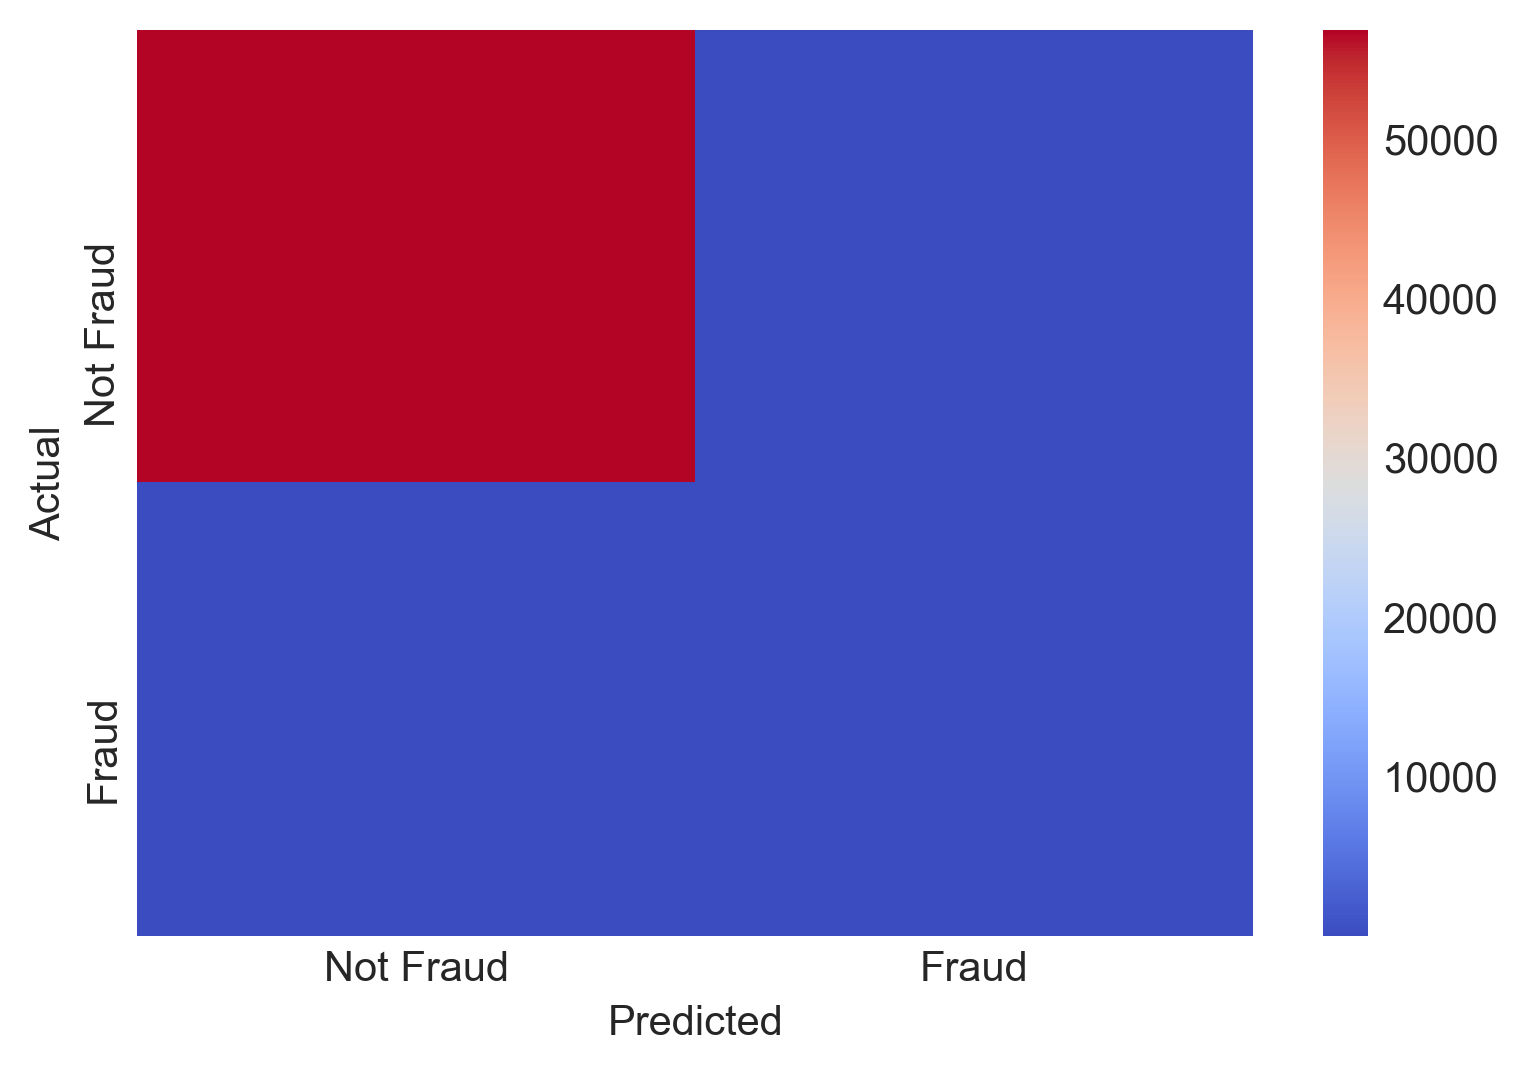

In [113]:
# HeatMap
sns.heatmap(cnf,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()